# Exercise 2 - Python example 

*Created by Julia Kukulies* 

## Part 1: Wind speed and NAO time series for Gothenburg 

In [22]:
import xarray as xr
import numpy as np 
import pandas as pd 

In [23]:
# same steps as in exercise 1 to read in data 
path = 'sfcWind_Amon_CMCC-CM2-HR4_historical_r1i1p1f1_gn_185001-201412.nc'
dataset= xr.open_dataset(path)
longitude = dataset['lon']
latitude = dataset['lat']
windspeed= dataset['sfcWind']

# get indices for closest grid cell 
lon = 12
lat = 58
lon_idx = (np.abs(longitude - lon)).argmin()
lat_idx = (np.abs(latitude - lat)).argmin()

# use xarray.sel function to select grid cell coordinates, but not time in order to get the time series array
timeseries = dataset.sel(lon=longitude[lon_idx]).sel(lat=latitude[lat_idx])

# what you get is an array with 1980 elements, which corresponds to the time series of wind speeds in Gothenburg
timeseries_wind = timeseries.sfcWind

In [24]:
# get corresponding times in yyyymm format (as in exercise 1) 
yyyymm_ws = np.array(())
for date in timeseries.time.values:
    # year as string 
    year = str(date.year)
    # month as string 
    month = str(date.month)
    # zero-padding for months < 10, to obtain same length
    if date.month < 10:
        month = '0' + str(date.month)
    yyyymm_ws = np.append(yyyymm_ws, year+month)

In [25]:
# Read in NAO timeseries (as in exercise 1) 
path = 'nao_station_monthly.txt'
nao = pd.read_table(path, header= 1, delimiter = '\s+' , na_values = -999)

# get a 1D array of NAO timeseries 
timeseries_nao  = nao.values

# get corresponding times in yyyymm format (as in exercise 1) 
yyyymm_nao = np.empty((nao.shape[0],nao.shape[1])).astype(str)
for col in np.arange(nao.shape[1]):
    for row in np.arange(nao.shape[0]):
        year = str(nao.index[row])
        # think again of zero-padding 
        if col < 9: 
            month = '0' +str(col+ 1)
        else:
            month = str(col + 1)
        yyyymm_nao[row,col] = year + month

In [26]:
# Find common times 
common_times = np.intersect1d(yyyymm_nao, yyyymm_ws)

# select datapoints for wind and NAO which match the common times 
wind_common = np.array(())
nao_common = np.array(())

for t in common_times:
    wind_common = np.append(wind_common, timeseries_wind[yyyymm_ws == t]) 
    nao_common = np.append(nao_common, timeseries_nao[yyyymm_nao == t]) 

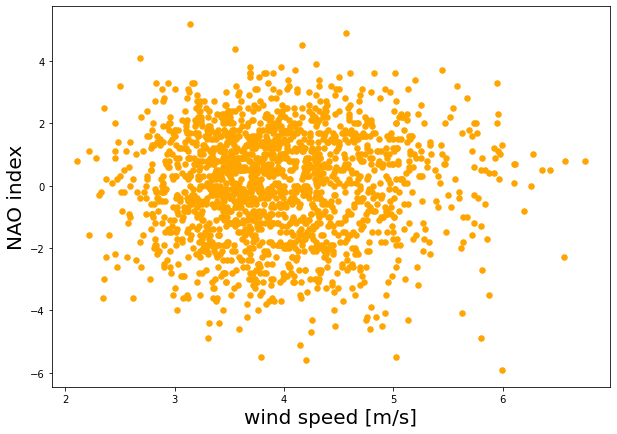

In [27]:
# scatter plot 

import matplotlib.pyplot as plt # python package for plotting 

plt.figure(figsize= (10,7))
# define fontsize 
s= 20
plt.scatter(wind_common, nao_common, color = 'orange', s= 30 )
plt.xlabel('wind speed [m/s]', fontsize= s)
plt.ylabel('NAO index', fontsize= s)

plt.show()

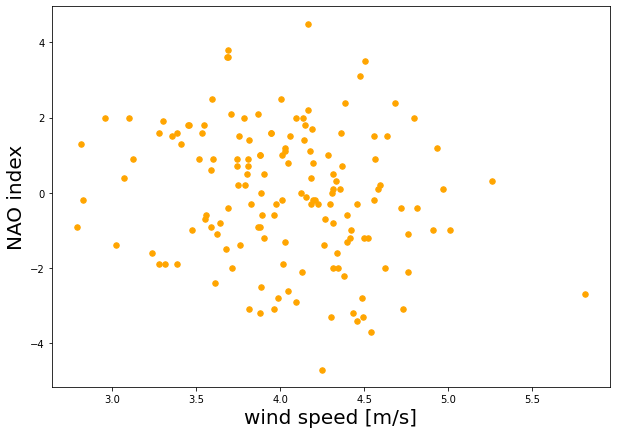

In [28]:
# scatter plot only for October dates 

plt.figure(figsize= (10,7))
# define fontsize 
s= 20

# select October months via indexing (remember that Python arrays are 0-indexed ;))
# general indexing rule = i:j:k, where i= start, j=end, k=step
plt.scatter(wind_common[9::12], nao_common[9::12],  color = 'orange', s= 30 )
plt.xlabel('wind speed [m/s]', fontsize= s)
plt.ylabel('NAO index', fontsize= s)
plt.show()


In [29]:
# correlation coefficient 
from scipy import stats
x = wind_common[9::12]
y = nao_common[9::12]
rr, p = stats.pearsonr(x, y)
print(rr, p)

-0.1892335381882278 0.02038227299422537


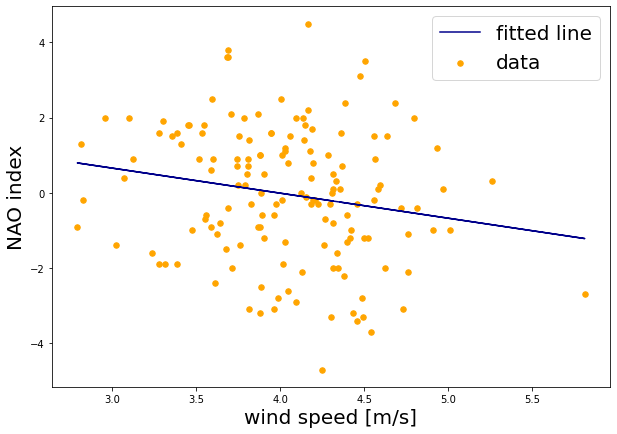

In [30]:
# regression line (this function also gives you the r- and p- values)
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
 
# draw regression line on top of scatter plot 

plt.figure(figsize= (10,7))
# define fontsize 
s= 20

# select October months via indexing (remember that Python arrays are 0-indexed ;))
# general indexing rule = i:j:k, where i= start, j=end, k=step
plt.scatter(x,y, color = 'orange', s= 30, label = 'data')
plt.plot(x, intercept + slope*x, 'darkblue', label='fitted line')
plt.legend(fontsize = s)
plt.xlabel('wind speed [m/s]', fontsize= s)
plt.ylabel('NAO index', fontsize= s)
plt.show()


## Part 2: Daily air temperature and monthly wind 

In [31]:
path = 'ta_day_CMCC-CM2-HR4_historical_r1i1p1f1_gn_20000101-20011231.nc'
dataset = xr.open_dataset(path)

# extract variables from dataset object, you know the game now :)
lons = dataset['lon']
lats = dataset['lat']
lev = dataset['plev']
airtemp = dataset['ta']

# have a look at dataset structure 
display(dataset)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 192, lon: 288, plev: 8, time: 730)
Coordinates:
  * time       (time) object 2000-01-01 12:00:00 ... 2001-12-31 12:00:00
  * plev       (plev) float64 1e+05 8.5e+04 7e+04 5e+04 ... 1e+04 5e+03 1e+03
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    ta         (time, plev, lat, lon) float32 ...
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    comment:                none
    contact:                T. Lovato
    creation_date:          2020-08-26T12:19:29Z
    data_specs_version:     01.00.31
    experiment:             all-forcing simulation of the recent past
    experiment_id:          historical
    external_variables:     areacella
    forcing_index:          1
    frequency:              day
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.CMCC.CMCC-CM...
    grid:                   native atmosphere regular grid
    grid_label:             gn
    history:                2020-08-26T12:19:29Z ;rewrote data to be consiste...
    initialization_index:   1
    institution:            Fondazione Centro Euro-Mediterraneo sui Cambiamen...
    institution_id:         CMCC
    mip_era:                CMIP6
    nominal_resolution:     100 km
    parent_activity_id:     CMIP
    parent_experiment_id:   piControl
    parent_mip_era:         CMIP6
    parent_source_id:       CMCC-CM2-HR4
    parent_time_units:      days since 1850-01-01
    parent_variant_label:   r1i1p1f1
    physics_index:          1
    product:                model-output
    realization_index:      1
    realm:                  atmos
    references:             none
    run_variant:            1st realization
    source:                 CMCC-CM2-HR4 (2016): \naerosol: prescribed MACv2-...
    source_id:              CMCC-CM2-HR4
    source_type:            AOGCM
    sub_experiment:         none
    sub_experiment_id:      none
    table_id:               day
    table_info:             Creation Date:(05 February 2020) MD5:6a248fd76c55...
    title:                  CMCC-CM2-HR4 output prepared for CMIP6
    variable_id:            ta
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.5.0
    tracking_id:            hdl:21.14100/9c5552dd-9835-4785-8195-bc020c4e64e6

**! Next step is again to extract Gothenburg coordinates, so here comes a useful hint (for the curious and motivated programmer) when you do an operation again and again, just on different data: You can define a function, which contains the code and then just call the function with a different input parameter. If this feels too much, you can just do it like before, but otherwise it could look like this:**

In [32]:
def get_gothenburg(lons, lats,data, t= None):
    """This function extracts a the grid cell closest to Gothenburg from a global netCDF file. 
    
    Args: 
    lons: longitude values for dataset as numpy array 
    lats: latitude values for dataset as numpy array 
    t: time as YYYYMMDD string, if None all times available in the grid cell will be selected  
    data: dataset as xarray
    
    Returns: 
    selected grid cell for dataset, either as single value or multidimensional array 
    """
    lon = 12
    lat = 58
    lon_idx = (np.abs(lons - lon)).argmin()
    lat_idx = (np.abs(lats - lat)).argmin()
    gridcell = dataset.sel(lon=lons[lon_idx]).sel(lat=lats[lat_idx])
    
    # additional, if we also want to extract a specific time point: 
    if t != None: 
        # get time index from time string (you have done all steps previously)   
        yyyymmdd = np.array(())
        for date in data.time.values:
            # year as string 
            year = str(date.year)
            # month as string 
            month = str(date.month)
            # zero-padding for months < 10, to obtain same length
            if date.month < 10:
                month = '0' + str(date.month)
            # day as string 
            day = str(date.day)
            if date.day < 10:
                day = '0' + str(date.day) 
            # add joined string to new array 
            yyyymmdd = np.append(yyyymmdd, year + month + day)    

        time_idx = np.where(yyyymmdd == t)
        gridcell = dataset.sel(lon=lons[lon_idx]).sel(lat=lats[lat_idx]).sel(time= dataset.time.values[time_idx])
    
    return gridcell

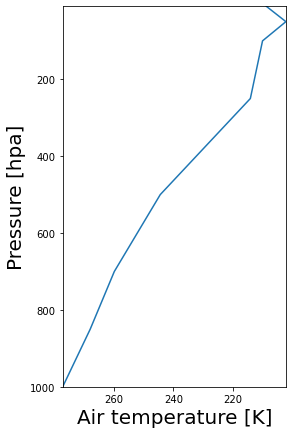

In [33]:
# call the function 
t = '20000301'
gridcell = get_gothenburg(lons, lats, dataset, t)


# plot profile 
plt.figure(figsize = (4,7))
# extract variables for plottig from xarray dataset
temp = gridcell.ta.values[0]
# I divide by 100 to convert from Pa to hPa, which is more commonly used 
pressure =gridcell.plev.values/100

plt.plot(temp , pressure) 
# invert y axis to get the highest pressure on the bottom 
plt.axis([max(temp),min(temp),max(pressure),min(pressure)])
plt.xlabel('Air temperature [K]', fontsize = s)
plt.ylabel('Pressure [hpa]', fontsize = s)

plt.show()

**Hovmoeller diagram: Altitude(Time)** 

*np.pcolormesh:* function to plot 3D data (x= time, y = altitude, z = temperature)

Check out the documentation to see, which input parameters you need:

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pcolormesh.html


*plt.meshgrid:* function to create a grid with coordinate values for each datapoint (required input for *plt.pcolormesh*)

https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html




In [34]:
# get entire time series for Gothenburg grid cell (no input for t if you use the self-created function )
timeseries = get_gothenburg(lons, lats, dataset)
temp = timeseries.ta.values

# now we have the data points for time x altitude 
print(temp.shape)

(730, 8)


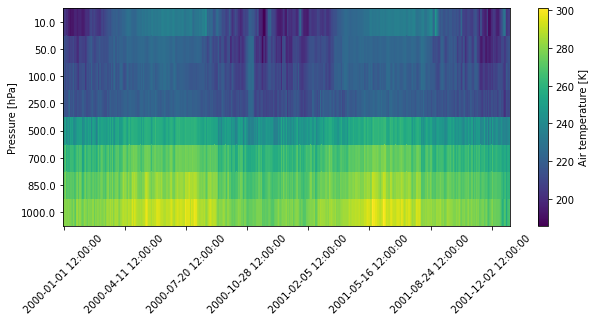

In [35]:
# create grid for values 
y, x = np.meshgrid(np.arange(pressure.shape[0]), np.arange(temp.shape[0]))

# make the plot 
plt.figure(figsize=(10,4))
# flip the chart, so that you have values for high pressure at the bottom again
plt.pcolormesh(x, y, np.flip(temp, axis = 0), cmap = 'viridis', shading = 'auto')
plt.colorbar(label= 'Air temperature [K]')
plt.ylabel('Pressure [hPa]')

# now, make sure you have the right labeling:
# show only every 100th time string
plt.xticks(np.arange(temp.shape[0])[::100], timeseries.time.values.astype(str)[::100], rotation= 45)
# pressure values with highest at surface (note that we plot pressure levels as equidistant fields)
plt.yticks(np.arange(pressure.shape[0]), labels = pressure)

plt.show()

**Monthly means of Gothenburg air temperature**

**1. Easy: ignore the fact that months have different day numbers** 

In [39]:
# month counter 
compt = 0 
# empty array to fill with values 
monthly_temp = np.zeros((24,))

# assume 30 days in each month
for iday in np.arange(0, np.shape(temp)[0] - 29, 30):
    monthly_temp[compt] = np.mean(temp[iday:iday + 29])
    compt += 1 

**2. More complicated, but better: account for the different numbers of days in each month (no leap years)**

In [37]:
# day counter used for indexing 
othercompt = 0 
# way to see how many individual months we got
nr_months = int(np.shape(temp)[0]/365*12 )
# empty array to fill with values 
monthly_temp = np.zeros((nr_months,))

for m in np.arange(nr_months): 
    if np.mod(m,12) == 2:
        nbdays= 2
    elif np.mod(m,12) == 4 or np.mod(m,12) == 6 or np.mod(m,12) == 9  or np.mod(m,12) == 11:
        nbdays = 30 
    else:
        nbdays = 31 
    # extract only surface temperatures 
    monthly_temp[m] = np.mean(temp[othercompt:othercompt + nbdays, 0])
    othercompt += nbdays 


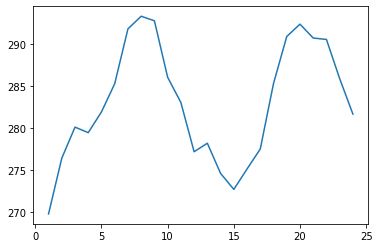

In [38]:
# quick plot to verify seasonal cycle of two years 
plt.plot(np.arange(1,25), monthly_temp)
plt.show()

**Lazy (and more pythonic!) version: make use of the datetime format of the xarray object that saves months as attributes of each value - show the one-liner it to your matlab colleagues and be happy :) !** http://xarray.pydata.org/en/stable/generated/xarray.DataArray.groupby.html


**Advanced: Can you find out how you can make use of the datetime, but calculate monthly means for individual years?**

In [633]:
# this is how you would get the monthly means (also averaged over year)
monthly_means = timeseries.groupby(timeseries.time.dt.month).mean("time").ta.values[:,0]

**Correlation between monthly aire temperatures and monthtly wind speeds** 

In [634]:
# we still have the monthly wind time series here 
display(timeseries_wind)

<xarray.DataArray 'sfcWind' (time: 1980)>
array([4.352011, 4.37783 , 4.839254, ..., 4.356162, 3.86875 , 4.695633],
      dtype=float32)
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    lat      float64 57.96
    lon      float64 12.5
    height   float64 10.0
Attributes:
    standard_name:  wind_speed
    long_name:      Near-Surface Wind Speed
    comment:        near-surface (usually, 10 meters) wind speed.
    units:          m s-1
    original_name:  U10
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2020-08-26T10:13:32Z altered by CMOR: Treated scalar dime...

In [636]:
# find common times between winds and temperatures 

# again, we can make use of the very handy date times of the xarray to select times
wind_common = timeseries_wind.sel(time=timeseries_wind.time.dt.year.isin([2000,2001])).values

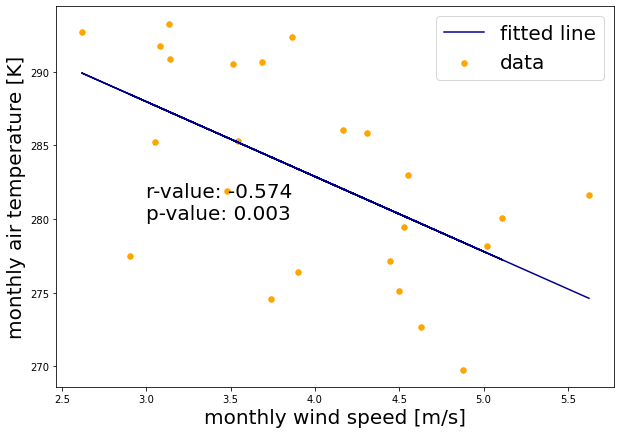

In [666]:
# check correlation (same as before, so would be another example where you could have a function instead)

x= wind_common 
y = monthly_temp

# regression line (this function also gives you the r- and p- values)
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
 
# draw regression line on top of scatter plot 

plt.figure(figsize= (10,7))
# define fontsize 
s= 20

# select October months via indexing (remember that Python arrays are 0-indexed ;))
# general indexing rule = i:j:k, where i= start, j=end, k=step
plt.scatter(x,y, color = 'orange', s= 30, label = 'data')
plt.plot(x, intercept + slope*x, 'darkblue', label='fitted line')
plt.legend(fontsize = s)
plt.xlabel('monthly wind speed [m/s]', fontsize= s)
plt.ylabel('monthly air temperature [K]', fontsize= s)

# show this time r and p values in diagram 
text= 'r-value: ' +  str(np.round(r_value, decimals =3)) + '\n' + 'p-value: ' +  str(np.round(p_value, decimals = 3))
plt.text(3, 280, text, fontsize= s)
plt.show()

## Part 3: Ocean and air temperature and their relationship to NAO 

In [790]:
# load ocean temperatures 
path ='thetao_Omon_CMCC-CM2-HR4_historical_r1i1p1f1_gn_200001-200112.nc'
oceandata= xr.open_dataset(path)
lonO = oceandata['longitude']
latO = oceandata['latitude']
levO = oceandata['lev']
thetao = oceandata['thetao']

In [681]:
# check out which dimensions are coordinates, levels, and time (alternatively display(oceandata))
thetao.dims

('time', 'lev', 'i', 'j')

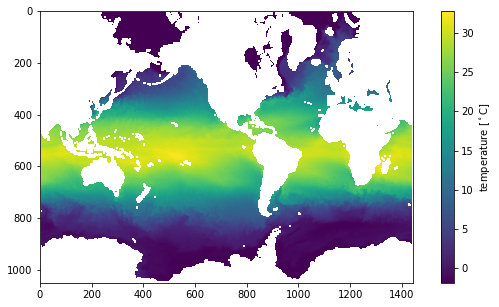

In [910]:
# plot global ocean surface temperature at any date (here: Jan 2000)
#(plt.imshow is a bit faster and easier to use for a quick check than pcolormesh)
# cartopy is the python package for beautiful maps, but that comes in the next session 

plt.figure(figsize = (10,5))
plt.imshow(np.flip(thetao[0,0], axis =0)) # flip to show north on the top 
plt.colorbar(label= 'temperature [$^\circ$C]')
plt.show()

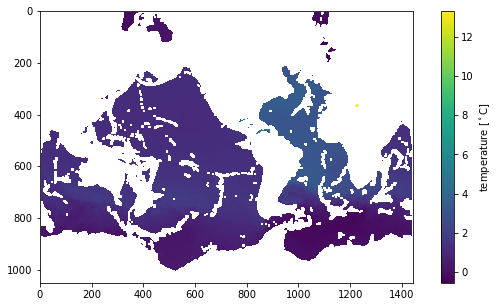

In [909]:
# same plot but for 3000m depth 

# get index of rightlev value
lev_idx = (np.abs(lev0 - 3000)).argmin()

# use the sel function for the xarray again (better because you can make less mistakes)
thetao_sel = thetao.sel(lev=lev0[lev_idx])

# alternatively just use index and know which dimension refers to levels
thetao_sel = thetao[0,lev_idx]

# plot 
plt.figure(figsize = (10,5))
plt.imshow(np.flip(thetao_sel, axis =0))
plt.colorbar(label= 'temperature [$^\circ$C]')
plt.show()

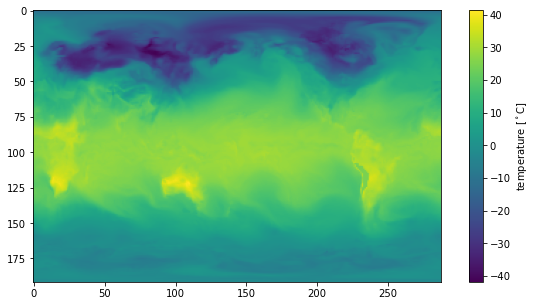

In [908]:
# plot monthly air temperature for same date (Jan 2000)
# if you forgot, check above the airtemp dimensions ('time', 'plev', 'lat', 'lon')


# this time plot temperature in degree celsius (to have the same unit as for ocean temperature)
plt.figure(figsize = (10,5))
plt.imshow(np.flip(airtemp[0,0]- 273.15, axis = 0))
plt.colorbar(label= 'temperature [$^\circ$C]')
plt.show()

**Correlating timeseries for each grid for ocean temperature at 50m  cell with timeseries of NAO index**

In [777]:
# select 50 m depth
lev_idx = (np.abs(levO - 50)).argmin()
thetao_timeseries = thetao.sel(lev=levO[lev_idx])

# get common times for NAO (Jan 2000 - Dec 2001), for you can make use of the index of the pandas dataframe
nao_common = nao[(nao.index == 2000) | (nao.index == 2001)].values.flatten()

In [984]:
correlation_map = np.empty(np.shape(thetao_timeseries[0]))
correlation_sig = np.empty(np.shape(thetao_timeseries[0]))
# initialize with nan values 
correlation_map[:] = np.nan
correlation_sig[:] = np.nan

# we have to loop through each grid cell (takes some time...):
for i in np.arange(lat0.shape[0]):
    for j in np.arange(lat0.shape[1]):
        gridcell = thetao_timeseries[:, i, j]
        
        # only include grid cells in ocean, not over land
        if np.isnan(gridcell.values).any() == False: 
            rr, p = scipy.stats.pearsonr(gridcell, nao_common)
            correlation_map[i, j] = rr
            # check and see whether it makes a difference to only extract significant correlations
            if p < 0.05:
                correlation_sig[i, j] = rr

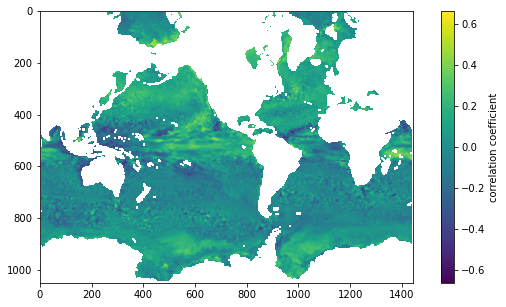

In [944]:
# plot correlation map 
plt.figure(figsize = (10,5))
plt.imshow(np.flip(correlation_map, axis = 0))
plt.colorbar(label = 'correlation coefficient')
plt.show()

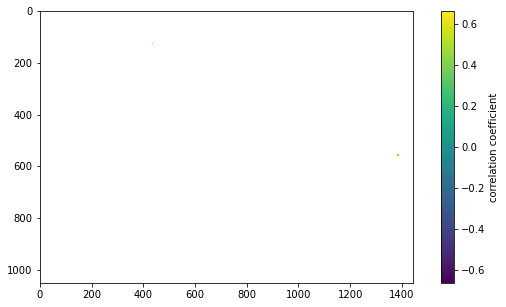

In [985]:
# plot correlation map for significant correlations

plt.figure(figsize = (10,5))
plt.imshow(np.flip(correlation_sig, axis = 0))
plt.colorbar(label = 'correlation coefficient')
plt.show()